<a href="https://colab.research.google.com/github/Youssef-S-Ahmed/Iris-flower-analysis-classification/blob/main/Iris_Flower_Analysis_%26_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data preprocessing Tools

# 1.Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn import datasets
import seaborn as sns

#Machine
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_percentage_error

# 2.importing Dataset.

In [ ]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# 0: Represents Iris Setosa
# 1: Represents Iris Versicolor
# 2: Represents Iris Virginica

df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [ ]:
df.rename(columns={'sepal length (cm)': "sepal_length",
                        "sepal width (cm)": "sepal_width",
                        "petal length (cm)": "petal_length",
                        'petal width (cm)':"petal_width"}, inplace = True)

In [ ]:
# Count NaN values in each column
nan_counts = df.isna().sum()
nan_counts

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
target,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


All cols mean is nearly equal to Median which means data is normal Distributed

#Univariate Analysis

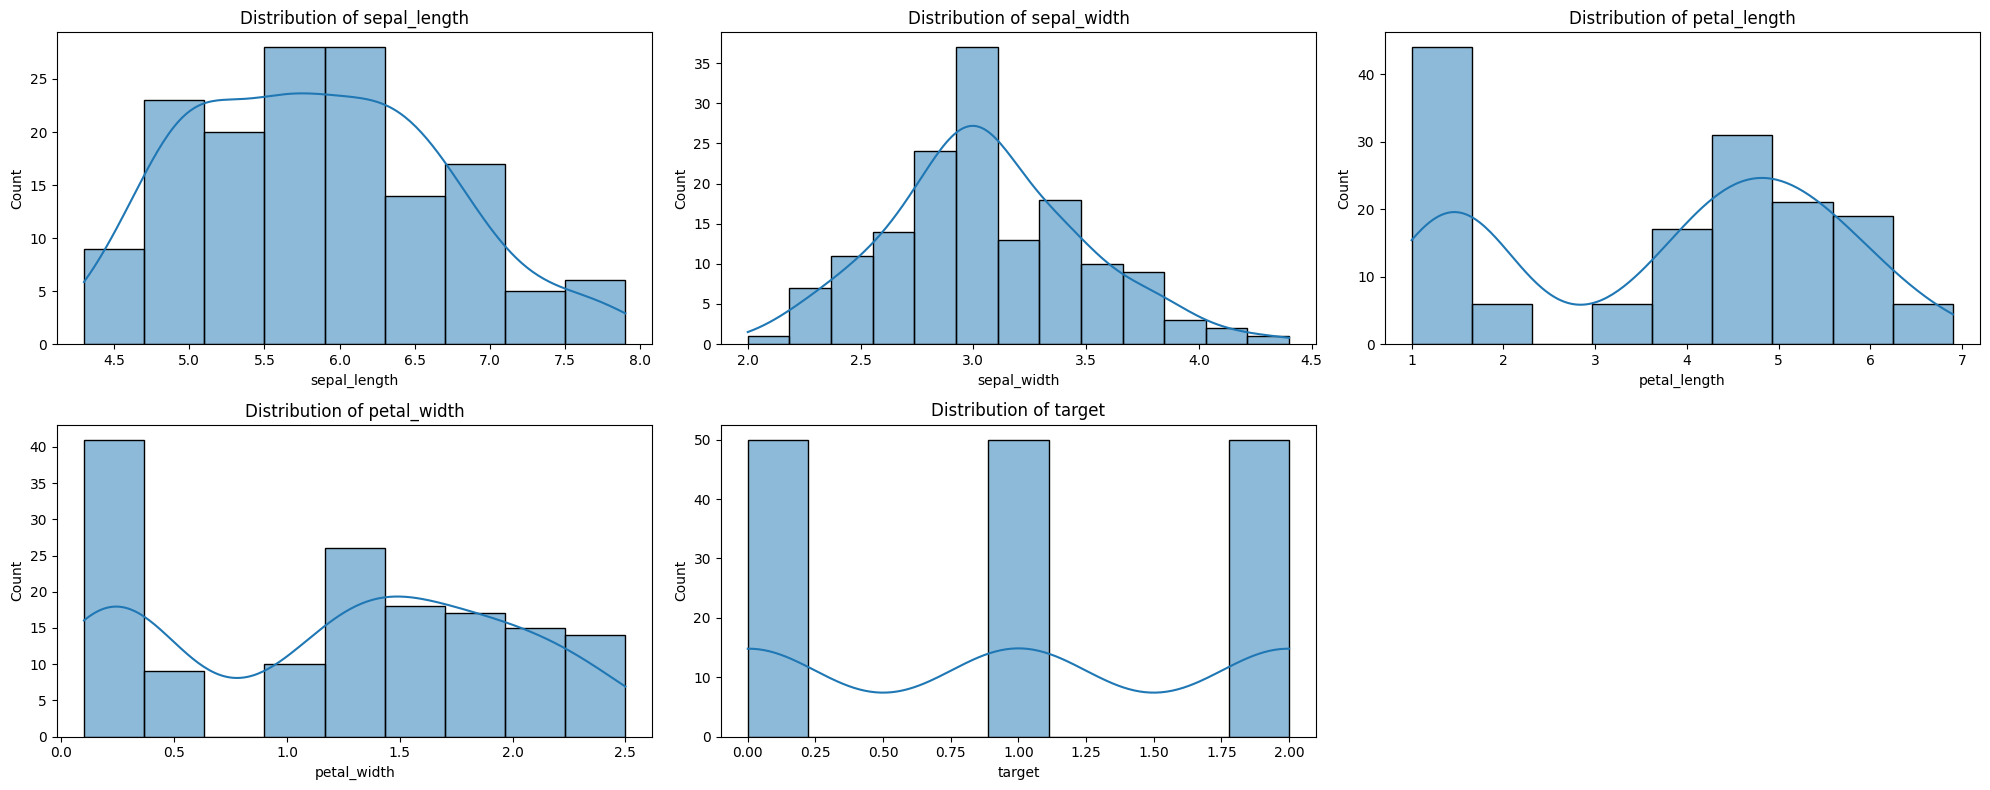

In [ ]:
plt.figure(figsize=(20,8))
for e,i in enumerate(df.columns):
  plt.subplot(2,3,e+1)
  plt.title("Distribution of "+i)
  sns.histplot(df[i],kde=True)
  plt.tight_layout()

#Bivariate Analysis

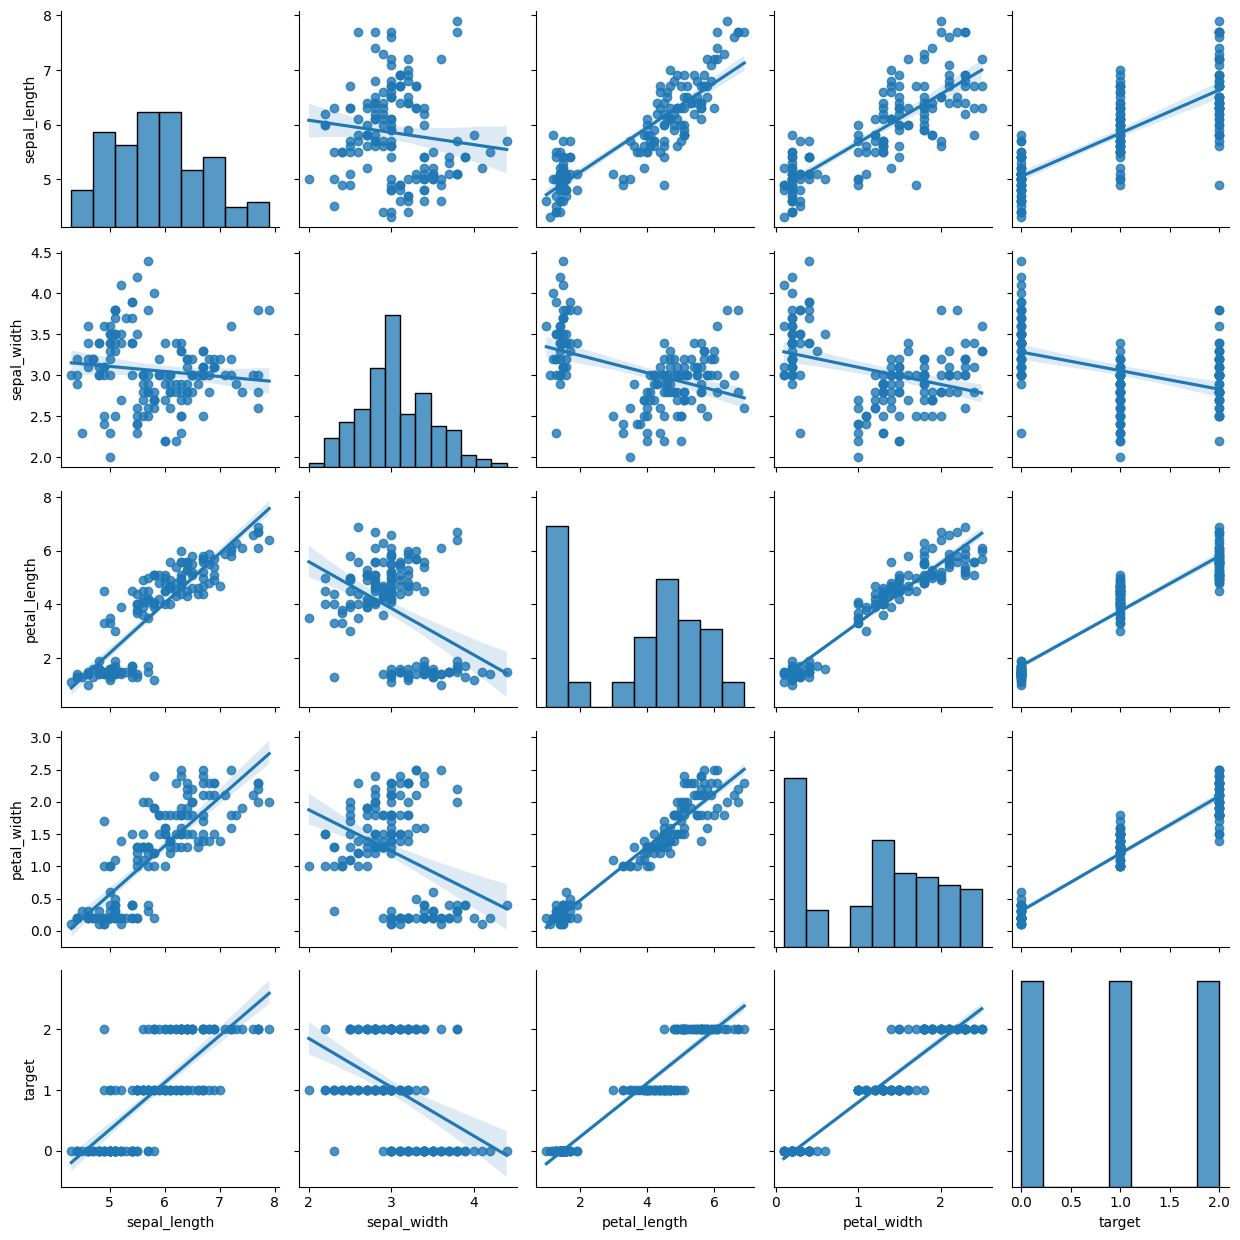

In [ ]:
corr = df
sns.pairplot(corr,kind = 'reg')
plt.tight_layout()

Text(0.5, 1.0, 'correlation between values')

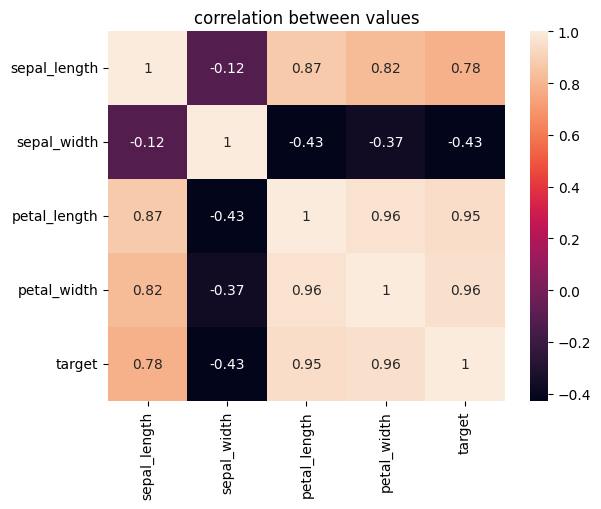

In [ ]:
#heatmap
sns.heatmap(corr.corr(), annot =True)
plt.title('correlation between values')

1. Strong +ve relation between sepal Length and Taregt
2. Strong +ve relation between petal Length and Taregt
3. Strong +ve relation between Petal Length and Taregt
4. -ve Relation between sepal width and Target

**Checking on outliers**

In [ ]:
px.box(data_frame = df, x="target")

In [ ]:
px.box(data_frame = df, x="sepal_length")

In [ ]:
px.box(data_frame = df, x="petal_length")

In [ ]:
px.box(data_frame = df, x="petal_width")

In [ ]:
px.box(data_frame = df, x="sepal_width")

In [ ]:
UB = 4
df[df.sepal_width> UB].count()

,0
sepal_length,3
sepal_width,3
petal_length,3
petal_width,3
target,3


In [ ]:
LB = 2.2
df[df.sepal_width < LB].count()

,0
sepal_length,1
sepal_width,1
petal_length,1
petal_width,1
target,1


In [ ]:
df = df[df.sepal_width < UB]
df = df[df.sepal_width > LB]

In [ ]:
df[df.sepal_width < LB].count()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
target,0


In [ ]:
df[df.sepal_width> UB].count()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
target,0


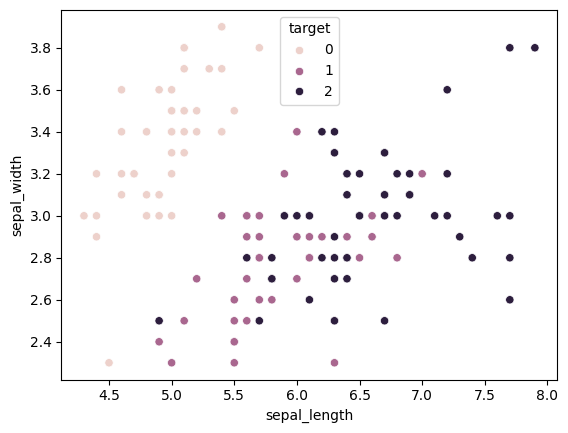

In [ ]:
#to Visually Distinguish between The 3 Iris Species
sns.scatterplot(x='sepal_length', y='sepal_width', hue='target', data=df)
plt.show()

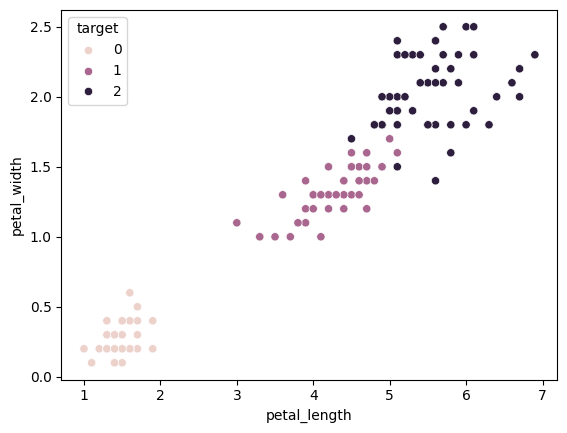

In [ ]:
sns.scatterplot(x='petal_length', y='petal_width', hue='target', data=df)
plt.show()

#Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
import statsmodels.api as sm

df["intercept"] = 1 # col is added for the linear Regression model
#OLS: Oridnary Least Square [taregt , [intercept ,feature]]
lm = sm.OLS(df['target'], df[['sepal_length','petal_length']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              1879.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):                   7.51e-102
Time:                        23:00:01   Log-Likelihood:                         -3.4589
No. Observations:                 142   AIC:                                      10.92
Df Residuals:                     140   BIC:                                      16.83
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sepal_length    -0.1576      0.012    -13.676      0.000      -0.180      -0.135
petal_length     0.5096      0.016     31.385      0.000       0.478       0.542
==============================================================================
Omnibus:                        1.042   Durbin-Watson:                   0.824
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                1.100
Skew:                          -0.122   Prob(JB):                        0.577
Kurtosis:                       2.645   Cond. No.                         6.74
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
data = df[['sepal_length','petal_length','target']]
data

,sepal_length,petal_length,target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [ ]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.25 , random_state=2)

In [ ]:
# create an instance
regressor = LinearRegression()

# training model using fit method
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)
print(y_pred)

[ 1.78185558  2.03414553  1.68617409 -0.03668869  0.05058039  0.03027139
  1.38612819  1.85357429 -0.07016873  0.0099624   1.34185643  1.46022622
  1.12066719  0.03027139  1.19000659  1.17683555 -0.07254804 -0.03668869
  1.16493896  0.9042366   1.85357429  1.92053437  1.89784606  1.83564461
  1.61921401  1.91339642 -0.05699768 -0.07492736  1.91815505  1.02022708
  1.49370626 -0.19567648  0.06613075  0.06613075 -0.09047772  1.76868453]


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 0.040217284093138954
MAE: 0.15008100352788692
RMSE: 0.20054247453629107
R-squared: 0.9463217299848526


**LR of R2 = 94%**

In [ ]:
# for i in range(100):
#   x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.25 , random_state=i)
#   regressor = LinearRegression()
#   regressor.fit(x_train,y_train)
#   y_pred = regressor.predict(x_test)
#   mse = mean_squared_error(y_test, y_pred)
#   mae = mean_absolute_error(y_test, y_pred)
#   rmse = np.sqrt(mse)
#   r2 = r2_score(y_test, y_pred)
#   print("R-squared:", r2)
#   print("i:", i)


R-squared: 0.9093756749374693
i: 0
R-squared: 0.9085682575873747
i: 1
R-squared: 0.9463217299848526
i: 2
R-squared: 0.9034213101947057
i: 3
R-squared: 0.9212365606489517
i: 4
R-squared: 0.839307364019286
i: 5
R-squared: 0.9168653417883335
i: 6
R-squared: 0.8869979594055312
i: 7
R-squared: 0.9109621273165764
i: 8
R-squared: 0.870869952616567
i: 9
R-squared: 0.8780062438203463
i: 10
R-squared: 0.9277680099897335
i: 11
R-squared: 0.9287371755943492
i: 12
R-squared: 0.9162404565430675
i: 13
R-squared: 0.9265539282340424
i: 14
R-squared: 0.938764142671752
i: 15
R-squared: 0.8591077338416976
i: 16
R-squared: 0.8892862356528622
i: 17
R-squared: 0.8761434674614217
i: 18
R-squared: 0.9325492941800337
i: 19
R-squared: 0.915678587765982
i: 20
R-squared: 0.8966669140696975
i: 21
R-squared: 0.8933132188910547
i: 22
R-squared: 0.9299697201290582
i: 23
R-squared: 0.8744582920245786
i: 24
R-squared: 0.9335668200735671
i: 25
R-squared: 0.9400335083310687
i: 26
R-squared: 0.9035219293982276
i: 27
R-squa

In [ ]:
# Removing last Col (dependnet value)
x = df.iloc[: , :-1].values
y = df.iloc[: , -1].values

In [ ]:
print (x) # x contains the features or the independent variables
print("--------------------------")
print(y) # y contains the dependent variables or the predicted that we want the model to be able to predict

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
x.shape

(150, 4)

In [ ]:
y.shape

(150,)

# Splitting the Dataset into Training set & Test set

In [ ]:
# creating instance
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.5 , random_state = 1)

print(x_train)
print("-----------------------")
print(y_train)
print("-----------------------")
print(x_test)
print("-----------------------")
print(y_test)

[[6.4 2.9 4.3 1.3]
 [6.5 3.  5.5 1.8]
 [5.  2.3 3.3 1. ]
 [6.3 3.3 6.  2.5]
 [5.5 2.5 4.  1.3]
 [5.4 3.7 1.5 0.2]
 [4.9 3.1 1.5 0.2]
 [5.2 4.1 1.5 0.1]
 [6.7 3.3 5.7 2.1]
 [4.4 3.  1.3 0.2]
 [6.  2.7 5.1 1.6]
 [6.4 2.7 5.3 1.9]
 [5.9 3.  5.1 1.8]
 [5.2 3.5 1.5 0.2]
 [5.1 3.3 1.7 0.5]
 [5.8 2.7 4.1 1. ]
 [4.9 3.1 1.5 0.1]
 [7.4 2.8 6.1 1.9]
 [6.2 2.9 4.3 1.3]
 [7.6 3.  6.6 2.1]
 [6.7 3.  5.2 2.3]
 [6.3 2.3 4.4 1.3]
 [6.2 3.4 5.4 2.3]
 [7.2 3.6 6.1 2.5]
 [5.6 2.9 3.6 1.3]
 [5.7 4.4 1.5 0.4]
 [5.8 2.7 3.9 1.2]
 [4.5 2.3 1.3 0.3]
 [5.5 2.4 3.8 1.1]
 [6.9 3.1 4.9 1.5]
 [5.  3.4 1.6 0.4]
 [6.8 2.8 4.8 1.4]
 [5.  3.5 1.6 0.6]
 [4.8 3.4 1.9 0.2]
 [6.3 3.4 5.6 2.4]
 [5.6 2.8 4.9 2. ]
 [6.8 3.2 5.9 2.3]
 [5.  3.3 1.4 0.2]
 [5.1 3.7 1.5 0.4]
 [5.9 3.2 4.8 1.8]
 [4.6 3.1 1.5 0.2]
 [5.8 2.7 5.1 1.9]
 [4.8 3.1 1.6 0.2]
 [6.5 3.  5.2 2. ]
 [4.9 2.5 4.5 1.7]
 [4.6 3.2 1.4 0.2]
 [6.4 3.2 5.3 2.3]
 [4.3 3.  1.1 0.1]
 [5.6 3.  4.1 1.3]
 [4.4 2.9 1.4 0.2]
 [5.5 2.4 3.7 1. ]
 [5.  2.  3.5 1. ]
 [5.1 3.5 1.

#SVM(Kernel'rbf')

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf" , random_state=0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)
print(y_pred)

[2 2 2 0 0 0 1 2 0 0 1 1 1 0 1 1 0 0 1 1 2 2 2 2 1 2 0 0 2 1 1 0 0 0 0 2]


In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))

[[14  0  0]
 [ 0  9  0]
 [ 0  2 11]]
0.9444444444444444
0.027777777777777776


Accuracy 94.4%

#Random Forest



In [ ]:
c = RandomForestClassifier(n_estimators=10 , criterion="entropy", random_state=0)
c.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred_3 = c.predict(x_test)

cm_3 = confusion_matrix(y_test,y_pred_3)
print(cm_3)
print(accuracy_score(y_test,y_pred_3))
print(mean_absolute_percentage_error(y_test, y_pred_3))

[[14  0  0]
 [ 0  7  2]
 [ 0  1 12]]
0.9166666666666666
0.06944444444444445


Accuracy 91.6%

#Decision Tree

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([2., 2., 2., 0., 0., 0., 2., 2., 0., 0., 1., 2., 1., 0., 1., 1., 0.,
       0., 1., 1., 2., 2., 2., 2., 2., 2., 0., 0., 2., 1., 2., 0., 0., 0.,
       0., 2.])

In [ ]:
cm_3 = confusion_matrix(y_test,y_pred)
print(cm_3)
print(accuracy_score(y_test,y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))

[[14  0  0]
 [ 0  7  2]
 [ 0  0 13]]
0.9444444444444444
0.05555555555555555


**DT of Acc = 94.4%**